In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_csv_data(folder_name, file_name):
    csv_path = os.path.join(folder_name, file_name+".csv")
    return pd.read_csv(csv_path, encoding='latin-1')

import rpy2 
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector

packnames = ('lme4', 'lmerTest','ggpubr')

utils = importr("utils")
utils.chooseCRANmirror(ind=1)
utils.install_packages(StrVector(packnames))
%load_ext rpy2.ipython

R[write to console]: trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/lme4_1.1-35.5.tgz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 7080907 bytes (6.8 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons


The downloaded binary packages are in
	/var/folders/rj/l30_wb7d3w7_tbx4gbz6lzzh0000gn/T//RtmpiJeFvb/downloaded_packages


In [2]:
%%R 
library(lme4) 
library(lmerTest)
library(ggpubr)

Loading required package: Matrix

Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step

Loading required package: ggplot2


### Marginal distinct idea counts

In [3]:
df_marginal_distinct = load_csv_data("data","marginal_distinct")

(0.95, 3.2)

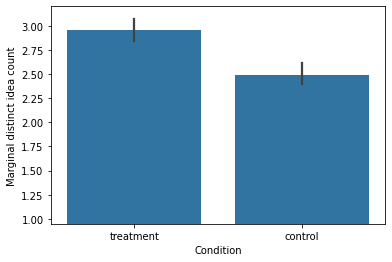

In [4]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="condition", y="marginal_distinct_cnt", data=df_marginal_distinct, errorbar=('ci', 95))
ax.set(xlabel='Condition', ylabel='Marginal distinct idea count')
plt.ylim(0.95,3.2)

In [5]:
%%R -i df_marginal_distinct 

df_marginal_distinct$condition = factor(df_marginal_distinct$condition) 
df_marginal_distinct$id = factor(df_marginal_distinct$id) 

mart = lmer(marginal_distinct_cnt ~ C(condition) + (1|round)+ (1|network_size) + (1|id), data=df_marginal_distinct) 
print(summary(mart))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
marginal_distinct_cnt ~ C(condition) + (1 | round) + (1 | network_size) +  
    (1 | id)
   Data: df_marginal_distinct

REML criterion at convergence: 4773.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.07143 -0.62879 -0.03928  0.61774  2.86515 

Random effects:
 Groups       Name        Variance Std.Dev.
 id           (Intercept) 0.61991  0.7873  
 network_size (Intercept) 0.58177  0.7627  
 round        (Intercept) 0.03242  0.1800  
 Residual                 1.16502  1.0794  
Number of obs: 1440, groups:  id, 360; network_size, 18; round, 4

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)             2.4944     0.2133  21.1276  11.696 1.08e-10 ***
C(condition)treatment   0.4569     0.1006 340.9978   4.541 7.76e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
 

In [6]:
%%R -i df_marginal_distinct 

df_marginal_distinct$condition = factor(df_marginal_distinct$condition)
df_marginal_distinct$id = factor(df_marginal_distinct$id) 

mart = lmer(marginal_distinct_cnt ~ C(condition) + round+ network_size + (1|id), data=df_marginal_distinct) 
print(summary(mart)) 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: marginal_distinct_cnt ~ C(condition) + round + network_size +  
    (1 | id)
   Data: df_marginal_distinct

REML criterion at convergence: 4786.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.83429 -0.64293 -0.04809  0.64518  2.93777 

Random effects:
 Groups   Name        Variance Std.Dev.
 id       (Intercept) 0.6801   0.8247  
 Residual             1.1956   1.0934  
Number of obs: 1440, groups:  id, 360

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              3.62057    0.15064  786.33287  24.034  < 2e-16 ***
C(condition)treatment    0.45694    0.10430  356.99998   4.381 1.55e-05 ***
round                    0.04250    0.02577 1079.00002   1.649   0.0994 .  
network_size            -0.13420    0.01005  356.99998 -13.351  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlat

### Non-redundant Idea Counts

In [7]:
df_nonredun = load_csv_data("data","nonredun")

[Text(0.5, 0, 'Condition'), Text(0, 0.5, 'Non-redundant idea count')]

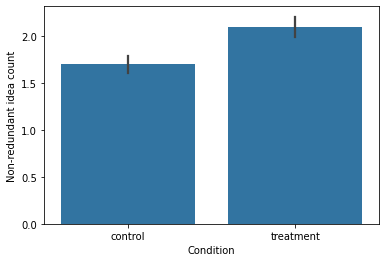

In [8]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="condition", y="nonredun_cnt", data=df_nonredun, errorbar=('ci', 95))
ax.set(xlabel='Condition', ylabel='Non-redundant idea count')

In [9]:
%%R -i df_nonredun 

df_nonredun$condition = factor(df_nonredun$condition) 
df_nonredun$id = factor(df_nonredun$id) 
df_nonredun$round = factor(df_nonredun$round) 

mart = lmer(nonredun_cnt ~ condition + (1|round) + (1|id), data=df_nonredun) 
print(summary(mart))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: nonredun_cnt ~ condition + (1 | round) + (1 | id)
   Data: df_nonredun

REML criterion at convergence: 4706.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.34580 -0.65198 -0.05188  0.62559  3.10335 

Random effects:
 Groups   Name        Variance Std.Dev.
 id       (Intercept) 0.63233  0.7952  
 round    (Intercept) 0.03694  0.1922  
 Residual             1.13782  1.0667  
Number of obs: 1440, groups:  id, 360; round, 4

Fixed effects:
                   Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)          1.7000     0.1197   6.1142  14.201 6.53e-06 ***
conditiontreatment   0.3958     0.1009 358.0001   3.922 0.000105 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
cndtntrtmnt -0.422


### Collective distinct

In [10]:
df_groupwise_distinct = load_csv_data("data","groupwise_distinct") 

In [11]:
%%R -i df_groupwise_distinct 

df_groupwise_distinct$condition = factor(df_groupwise_distinct$condition) # convert to nominal factor
df_groupwise_distinct$trial_id = factor(df_groupwise_distinct$trial_id)

mart = lmer(groupwise_distinct_cnt ~ condition + (1|round) + (1|trial_id), data=df_groupwise_distinct) # uses LMM
print(summary(mart))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: groupwise_distinct_cnt ~ condition + (1 | round) + (1 | trial_id)
   Data: df_groupwise_distinct

REML criterion at convergence: 565.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5644 -0.6140  0.1415  0.6062  2.2398 

Random effects:
 Groups   Name        Variance Std.Dev.
 trial_id (Intercept) 16.808   4.100   
 round    (Intercept)  5.813   2.411   
 Residual             62.984   7.936   
Number of obs: 80, groups:  trial_id, 10; round, 4

Fixed effects:
                   Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)          55.225      2.170  9.434  25.450 5.16e-10 ***
conditiontreatment    8.700      1.775 66.000   4.903 6.47e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
cndtntrtmnt -0.409


### CQ

In [12]:
df_cq = load_csv_data("data","cq")

(3.0, 8.0)

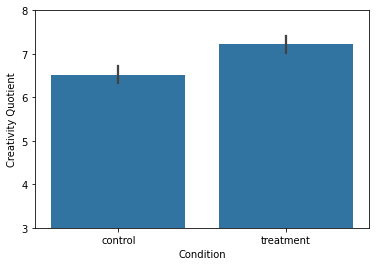

In [13]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="condition", y="cq", data=df_cq, errorbar=('ci', 95))
ax.set(xlabel='Condition', ylabel='Creativity Quotient')
plt.ylim(3,8)

In [14]:
%%R -i df_cq 

df_cq$condition = factor(df_cq$condition) # convert to nominal factor
df_cq$id = factor(df_cq$id) 
df_cq$round = factor(df_cq$round) 

mart = lmer(cq ~ condition + (1|round) + (1|id), data=df_cq) # uses LMM
print(summary(mart))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: cq ~ condition + (1 | round) + (1 | id)
   Data: df_cq

REML criterion at convergence: 6373.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3557 -0.5556 -0.0608  0.5005  4.2520 

Random effects:
 Groups   Name        Variance Std.Dev.
 id       (Intercept) 4.20140  2.050   
 round    (Intercept) 0.09485  0.308   
 Residual             3.04456  1.745   
Number of obs: 1440, groups:  id, 360; round, 4

Fixed effects:
                   Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)          6.5205     0.2265  11.7161   28.79 3.08e-12 ***
conditiontreatment   0.6998     0.2348 357.9999    2.98  0.00308 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
cndtntrtmnt -0.518


### Max(SemDis)

In [15]:
df_semdis = load_csv_data("data","semdis")

(0.98, 1.08)

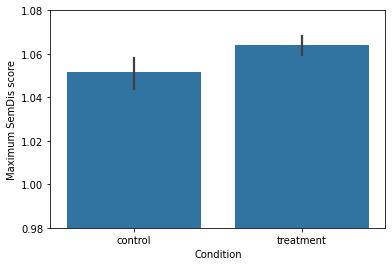

In [16]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="condition", y="semdis", data=df_semdis, errorbar=('ci', 95))
ax.set(xlabel='Condition', ylabel='Maximum SemDis score')
plt.ylim(0.98,1.08)

In [17]:
%%R -i df_semdis 

df_semdis$condition = factor(df_semdis$condition)

mart = lmer(semdis ~ condition + (1|round) + (1|id), data=df_semdis)
print(summary(mart))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: semdis ~ condition + (1 | round) + (1 | id)
   Data: df_semdis

REML criterion at convergence: -3035.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-12.2542  -0.4743  -0.0179   0.4930   3.1156 

Random effects:
 Groups   Name        Variance  Std.Dev.
 id       (Intercept) 0.0008605 0.02933 
 round    (Intercept) 0.0002492 0.01579 
 Residual             0.0062648 0.07915 
Number of obs: 1440, groups:  id, 360; round, 4

Fixed effects:
                    Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)        1.052e+00  8.705e-03 3.877e+00 120.824 4.45e-08 ***
conditiontreatment 1.220e-02  5.193e-03 3.580e+02   2.349   0.0193 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
cndtntrtmnt -0.298


### Gini analysis

In [18]:
df_gini = load_csv_data("data","gini")

[Text(0.5, 0, 'Condition'), Text(0, 0.5, 'Gini Coefficient')]

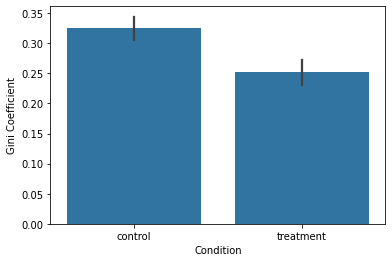

In [19]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="condition", y="gini", data=df_gini, errorbar=('ci', 95))
ax.set(xlabel='Condition', ylabel='Gini Coefficient')

In [20]:
%%R -i df_gini 

df_gini$condition = factor(df_gini$condition) # convert to nominal factor
df_gini$trial_id = factor(df_gini$trial_id)
df_gini$round = factor(df_gini$round)

mart = lmer(gini ~ condition + (1|round)+ (1|trial_id), data=df_gini) # uses LMM
print(summary(mart))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: gini ~ condition + (1 | round) + (1 | trial_id)
   Data: df_gini

REML criterion at convergence: -257.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.91861 -0.52278 -0.04951  0.55039  3.14754 

Random effects:
 Groups   Name        Variance Std.Dev.
 trial_id (Intercept) 0.001969 0.04437 
 round    (Intercept) 0.000000 0.00000 
 Residual             0.003252 0.05703 
Number of obs: 100, groups:  trial_id, 10; round, 5

Fixed effects:
                   Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)         0.32474    0.01618 11.70923  20.066 1.98e-10 ***
conditiontreatment -0.07270    0.01141 89.00000  -6.374 7.95e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
cndtntrtmnt -0.352
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')



boundary (singular) fit: see help('isSingular')


In [21]:
df_gini_networksize = load_csv_data("data","gini_networksize")

[Text(0.5, 0, 'Network Size'), Text(0, 0.5, 'Gini Coefficient')]

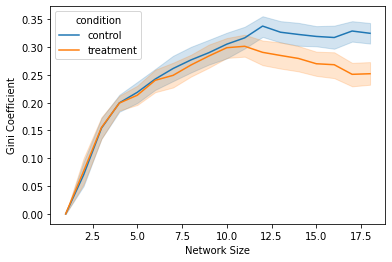

In [22]:
plt.figure(figsize=(6,4))
ax = sns.lineplot(data=df_gini_networksize, x="networksize", y="gini", hue="condition")
ax.set(xlabel='Network Size', ylabel='Gini Coefficient')

### Percentage of recommendations dominated by semantic features

In [23]:
df_explanation = load_csv_data("data","frac_sem")

`geom_smooth()` using formula = 'y ~ x'


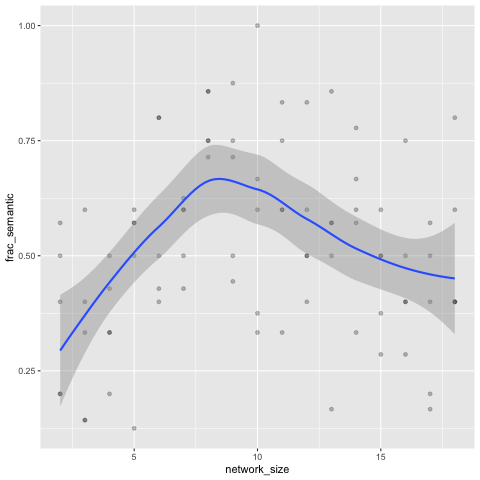

In [24]:
%%R -i df_explanation 

ggplot(data=df_explanation, aes(x=network_size, y=frac_semantic))+
geom_point(alpha = 0.25)+
geom_smooth(method=loess, se=TRUE) 

### Recommendation affects rating behavior

In [25]:
df_ratings = load_csv_data("data","ratings") 

In [26]:
%%R -i df_ratings 

df_ratings$condition = factor(df_ratings$condition)
df_ratings$idea_id = factor(df_ratings$idea_id)
df_ratings$for_alter_id = factor(df_ratings$for_alter_id)
df_ratings$from_ego_id = factor(df_ratings$from_ego_id)

mart = lmer(rating ~ condition+(1|idea_id)+(1|from_ego_id)+(1|for_alter_id), data=df_ratings) 
print(summary(mart))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rating ~ condition + (1 | idea_id) + (1 | from_ego_id) + (1 |  
    for_alter_id)
   Data: df_ratings

REML criterion at convergence: 93402.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4797 -0.6559 -0.0021  0.6851  3.4690 

Random effects:
 Groups       Name        Variance Std.Dev.
 idea_id      (Intercept) 0.06206  0.2491  
 from_ego_id  (Intercept) 0.48538  0.6967  
 for_alter_id (Intercept) 0.02787  0.1670  
 Residual                 1.02711  1.0135  
Number of obs: 31836, groups:  
idea_id, 1759; from_ego_id, 180; for_alter_id, 60

Fixed effects:
                      Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)          3.181e+00  5.698e-02 2.221e+02  55.829  < 2e-16 ***
conditionrecommended 4.168e-02  1.266e-02 3.162e+04   3.294 0.000989 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         